<a href="https://colab.research.google.com/github/Pachuchka/Python/blob/main/%C2%ABWorld_Happiness_Report_2019_sem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка библиотек

In [17]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

Загрузка Датасета

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/GeekBrains/ML pyLib/world_happiness_report_2019.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Анализ статистических характеристик

In [20]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Краткие выводы на первый взгляд:
Оценка стран скорее всего имеет нормальное распределение, судя по среднему, максимальному и минимальному
Странно видеть нулевые оценки - либо сравнение и оценка не корректна, либо относительная

In [21]:
# Фильтрация строк, где хотя бы одно значение равно 0
filtered_df = df[(df == 0).any(axis=1)]

# Вывод отфильтрованного DataFrame
print(filtered_df)

     Overall rank         Country or region  Score  GDP per capita  \
70             71                   Moldova  5.529           0.685   
81             82                    Greece  5.287           1.181   
111           112                   Somalia  4.668           0.000   
134           135                 Swaziland  4.212           0.811   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   

     Social support  Healthy life expectancy  Freedom to make life choices  \
70            1.328                    0.739                         0.245   
81            1.156                    0.999                         0.067   
111           0.698                    0.268                         0.559   
134           1.149                    0.000                         0.313   
153           0.517                    0.361                         0.000   
154           0.000                    0.

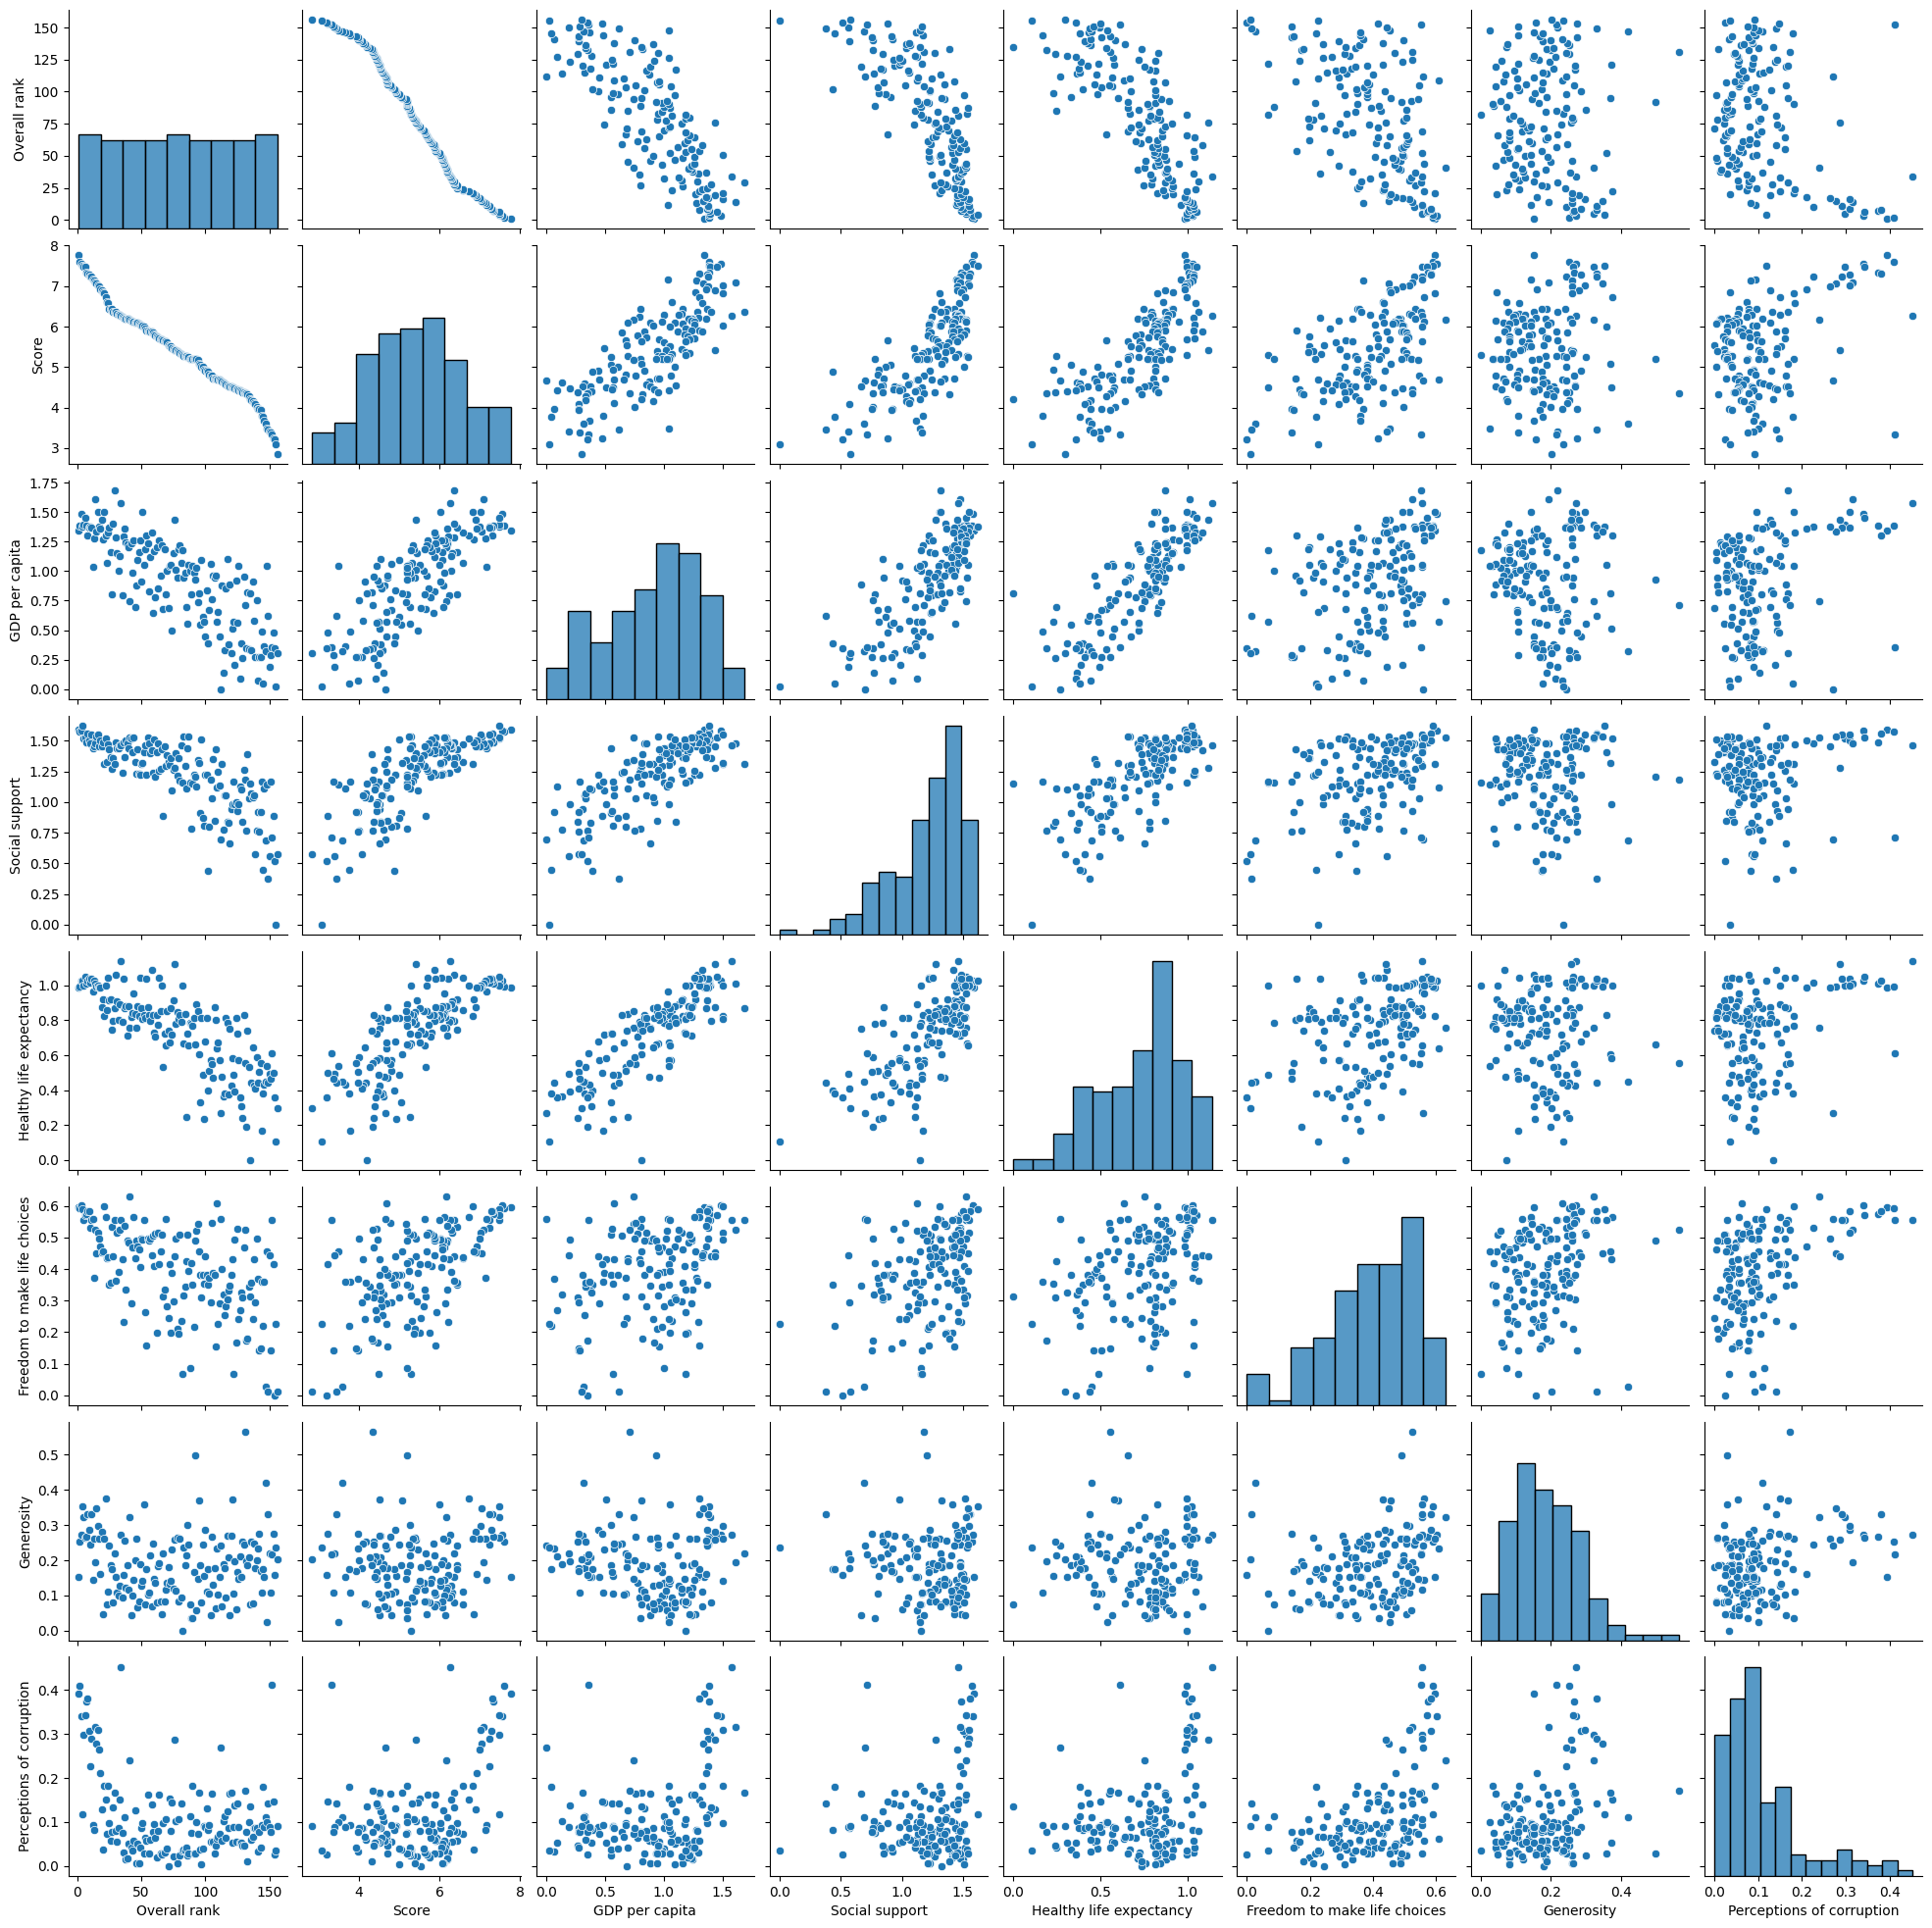

In [22]:
sns.pairplot(df)

**Задание 1:** Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используем коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [28]:
gdp_score = df[['GDP per capita', 'Score']]
#correlation = gdp_score['GDP per capita'].corr(gdp_score['Score'])
correlation = gdp_score.corr(method='pearson')
print(f'Коэффициент корреляции Пирсона между ВВП на душу населения и оценкой счастья: {correlation}')


Коэффициент корреляции Пирсона между ВВП на душу населения и оценкой счастья:                 GDP per capita     Score
GDP per capita        1.000000  0.793883
Score                 0.793883  1.000000


**Вывод:** Учитывая, что коэффициент корелляции изменяется от -1 до 1, можно утверждать, что между ВВП на душу населения и оценкой уровня счастья есть сильная положительная корреляция, т.е. взаимосвязь

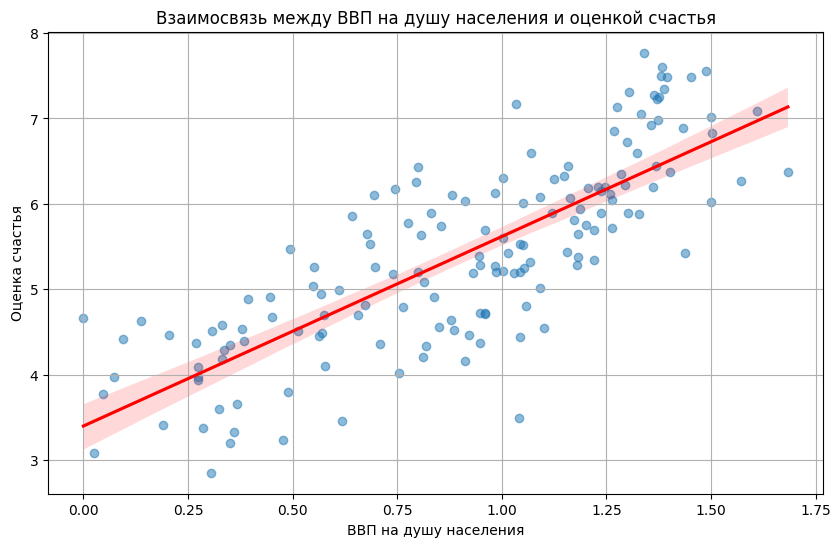

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita', y='Score', data=gdp_score, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Взаимосвязь между ВВП на душу населения и оценкой счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

**Задание 2:** Исследование влияния социальной поддержки на оценку счастья.
Применим коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

In [29]:
Social_support_score = df[['Social support', 'Score']]
#correlation = gdp_score['Social support'].corr(gdp_score['Score'])
correlation = gdp_score.corr(method='spearman')
print(f'Коэффициент корреляции Спирмена между Социальной поддержкой и оценкой счастья: {correlation}')


Коэффициент корреляции Спирмена между Социальной поддержкой и оценкой счастья:                 GDP per capita     Score
GDP per capita        1.000000  0.814483
Score                 0.814483  1.000000


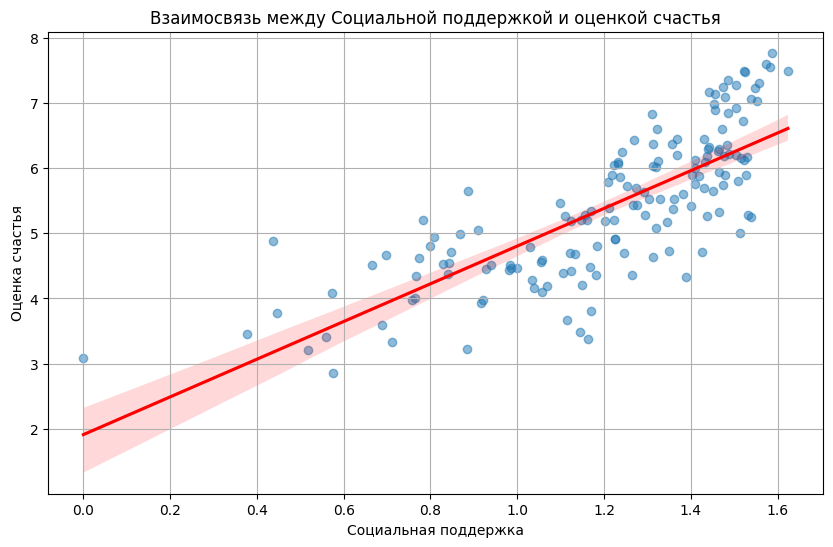

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Social support', y='Score', data=Social_support_score, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Взаимосвязь между Социальной поддержкой и оценкой счастья')
plt.xlabel('Социальная поддержка')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

**Вывод:** Между уровнем социальной поддержки и оценкой счастья есть сильная положительная корреляция, т.е. взаимосвязь. Коэффициент корреляции 0,814

**Задание 3:** Анализ взаимосвязи между продолжительностью здоровой жизни (Healthy life expectancy) и оценками счастья.
Использя коэффициент корреляции Кэнделла оценить связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

In [33]:
Healthy_score = df[['Healthy life expectancy', 'Score']]
correlation = Healthy_score.corr(method='kendall')
print(f'Коэффициент корреляции Кендэла между Продолжительностью здоровой жизни и оценкой счастья: {correlation}')

Коэффициент корреляции Кендэла между Продолжительностью здоровой жизни и оценкой счастья:                          Healthy life expectancy     Score
Healthy life expectancy                 1.000000  0.602613
Score                                   0.602613  1.000000


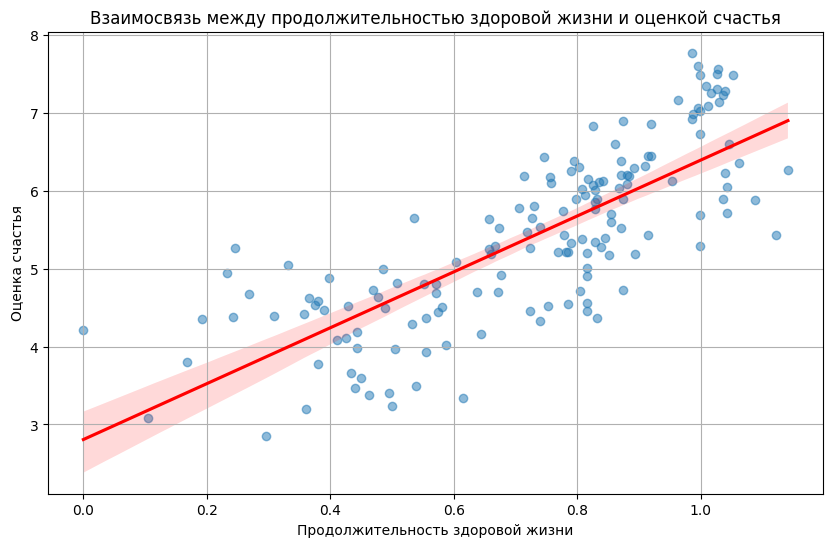

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Healthy life expectancy', y='Score', data = Healthy_score, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Взаимосвязь между продолжительностью здоровой жизни и оценкой счастья')
plt.xlabel('Продолжительность здоровой жизни')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

**Вывод:** Так же прослеживается сильная положительная корреляция между продолжительностью здоровой жизни и уровнем счастья, не смотря на то что коэффициенты в сравниваемых аналитиках разные, графический метод показывает что степень взаимосвязи всех трёх аналитик с оценкой счастья довольно таки близка

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [42]:
Freedom_score = df[['Freedom to make life choices', 'Score']]
correlation = Freedom_score .corr(method='pearson')
print(f'Коэффициент корреляции Пирсона между свободой выбора и оценкой счастья: {correlation}')

Коэффициент корреляции Пирсона между свободой выбора и оценкой счастья:                               Freedom to make life choices     Score
Freedom to make life choices                      1.000000  0.566742
Score                                             0.566742  1.000000


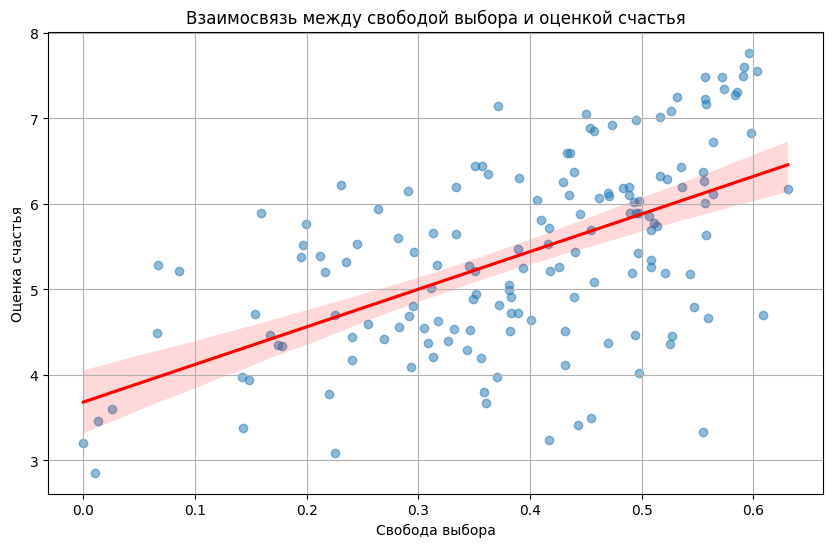

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='Score', data=Freedom_score, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Взаимосвязь между свободой выбора и оценкой счастья')
plt.xlabel('Свобода выбора')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

**Вывод:** Свобода выбора умеренно влияет на оценку счастья (не так сильно как ВВП на душу населения)

Постройте матрицу корреляции для всех признаков и сделайте вывод, о корреляционной зависимости между всеми признаками

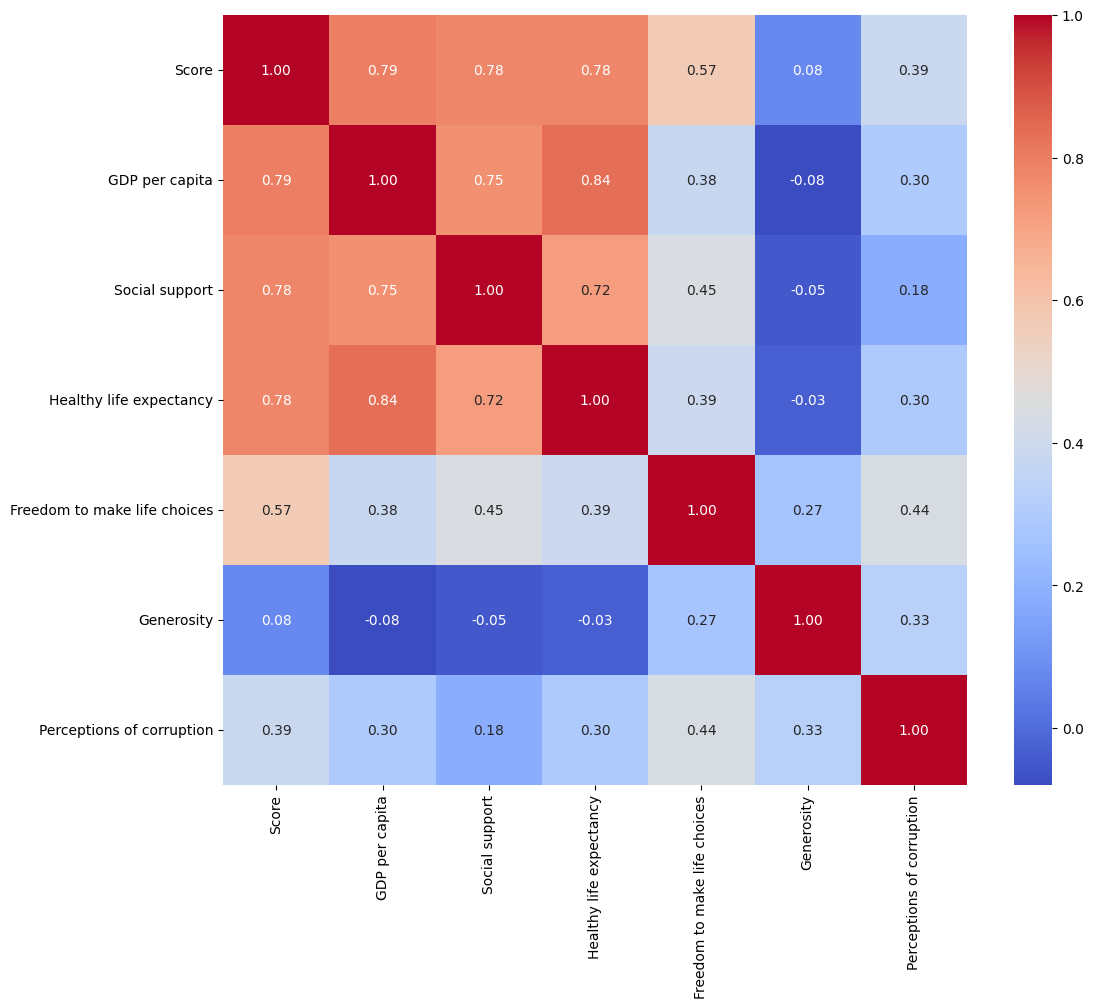

In [41]:
corr_df = df.select_dtypes(include=['float64'])

corr_matrix = corr_df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Вывод:** На основе анализа матрицы взаимосвязей можно увидель что сильнее всего на уровень оценки счастья влияет ВВП на душу населения, но отрыв от Социальной поддержки и продолжительностью здоровой жизни минимален.

Я считаю что такой результат достигается из-за того, что ВВП на душу населения во многом определяет и уровень соц. поддержки населения и их возможность сохранять здоровье как можно дольше за счёт медицины, хобби и денежных затрат на себя
